# Ridge Regression 2D 

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [ ]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

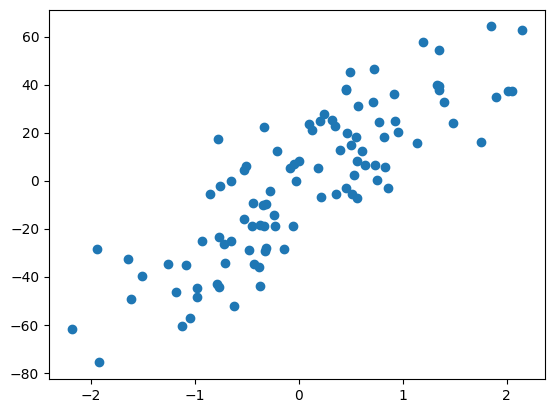

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [ ]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


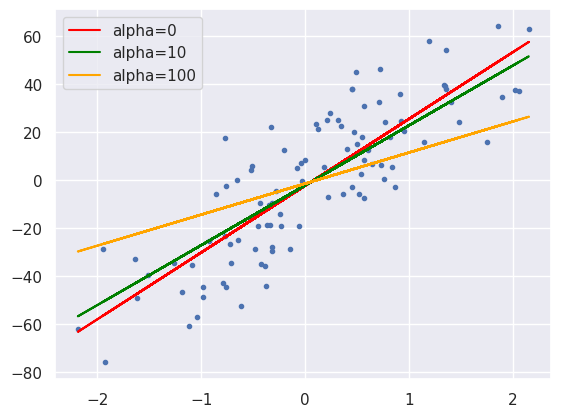

In [ ]:
import seaborn as sns
sns.set()
plt.plot(X,y,'.b')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [ ]:
class MeraRidge:
    
    def __init__(self, alpha=0.1):
        self.m = None
        self.b = None
        self.alpha = alpha
    
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
     
        for i in range(X_train.shape[0]):
            num = num + (y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
            den = den + (X_train[i]-X_train.mean())**2
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean()-(self.m*X_train.mean())
        
        print(self.m,self.b)

In [ ]:
mr = MeraRidge(alpha=100)
mr.fit(X,y)

[12.93442104] [-1.42484415]


# Ridge Regression N_Dimention 

In [3]:
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes

In [4]:
X,y = load_diabetes(return_X_y=True)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [6]:
from sklearn.linear_model import Ridge

In [8]:
reg = Ridge(alpha=.1,solver='cholesky')

In [10]:
reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [11]:
y_pred = reg.predict(X_test)

In [13]:
r2_score(y_test, y_pred)

0.5096501682005437

In [14]:
print(reg.coef_)
print(reg.intercept_)

[ -10.38295371 -238.39380164  473.39747572  306.04709741  -71.70084222
  -77.4732987  -203.53340725  111.73542641  411.80607874   93.10290584]
150.9449367688179


In [27]:
class Meraridge:

  def __init__(self, alpha=0.1):
    
    self.alpha = alpha
    self.intercept_ = None
    self.coef_ = None

  def fit(self,X_train, y_train):
    
    X_train = np.insert(X_train,0,1,axis=1)
    I = np.identity(X_train.shape[1])
    result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha*I).dot(X_train.T).dot(y_train)
    self.intercept_ = result[0]
    self.coef_ = result[1:]

  def predict(self, X_test):
    return np.dot(X_test, self.coef_) + self.intercept_

In [28]:
mr = Meraridge()
mr.fit(X_train,y_train)
y_pred = mr.predict(X_test)

In [31]:
r2_score(y_test, y_pred)
print(mr.coef_)
print(mr.intercept_)

[ -10.42078068 -238.36655035  473.40200398  306.048386    -71.68748413
  -77.44709292 -203.55974074  111.71039692  411.80713475   93.10105403]
150.90202612813607
